In [2]:
import random
import numpy
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def roll_d6():
    return int(random.randint(1,6))

def roll_d6_reroll_1and2():
    result = roll_d6()
    if result > 3:
        return result
    return roll_d6()

def roll_dice(how_many, rule):
    dice = [0] + [1] * how_many
    return reduce(rule, dice)

def roll_Nd6(number, number_of_dice):
    rule = lambda x, _y: x + roll_d6()
    rolls = numpy.zeros(number_of_dice * 6)
    for i in range(0, number_of_dice*number):
        roll = roll_dice(number_of_dice, rule)
        rolls[roll-1] += 1
    return (rolls/number)

def roll_Nd6_reroll_1_and_2(number, number_of_dice):
    rule = lambda x, _y: x + roll_d6_reroll_1and2()
    rolls = numpy.zeros(number_of_dice * 6)
    for i in range(0, number_of_dice*number):
        roll = roll_dice(number_of_dice, rule)
        rolls[roll-1] += 1
    return (rolls/number)

## 4W6

Hier die Ergebnisse für 4W6.

<Container object of 24 artists>

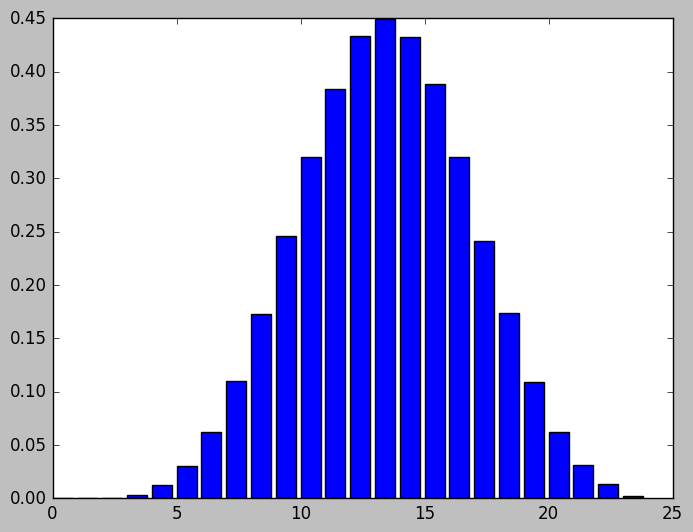

In [3]:
result = roll_Nd6(50000, 4)
fig, ax = plt.subplots()
ax.bar(np.arange(6*4), result)

## Reroll 1 and 2

Das hier ist das Ergebnis für das Calandra Feat.
Hier wurde **nicht** mit Fate Blessed gerechnet.

<Container object of 18 artists>

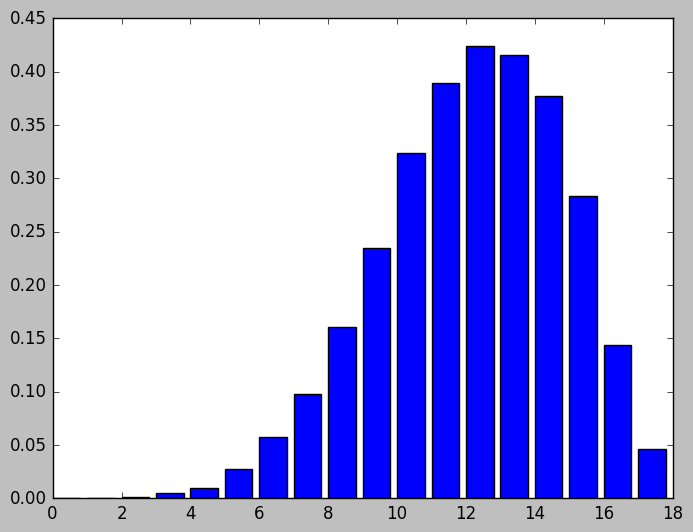

In [5]:
result = roll_Nd6_reroll_1_and_2(50000, 3)
fig, ax = plt.subplots()
ax.bar(np.arange(6*3), result)